傅里叶变换
===

二维离散傅里叶变换是将图像从空间域转至频域，在图像增强、图像去噪、图像边缘检测、图像特征提取、图像压缩等等应用中都起着极其重要的作用。傅里叶变换的理论基础是**任意函数都可以表示成正弦函数的线性组合的形式**

傅里叶变换的公式如下

$$F(\mu,\nu)=\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)e^{-j2\pi(\frac{\mu x}{M}+\frac{\nu y}{N})}$$

1. $f(x,y)$代表一副大小为$M \times N$的图像,$x=0,1,2,...,M-1$，$y=0,1,2,...,N-1$
2. $F(\mu,\nu)$表示$f(x,y)$的傅里叶变换

二维离散傅里叶逆变换公式如下

$$f(x,y)=\frac{1}{MN}\ \sum\limits_{\mu=0}^{M-1}\ \sum\limits_{\nu=0}^{N-1}\ F(\mu,\nu)\ e^{j2\pi(\frac{\mu x}{M}+\frac{\nu y}{N})}$$

# 1.傅里叶变换

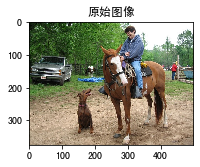

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
image = cv2.imread("data/02.jpg", 1)
K, L= 128, 128
channel = 3

def dft(img):
	H, W, _ = img.shape

	# Prepare DFT coefficient
	G = np.zeros((L, K, channel), dtype=np.complex)

	# prepare processed index corresponding to original image positions
	x = np.tile(np.arange(W), (H, 1))
	y = np.arange(H).repeat(W).reshape(H, -1)

	# dft
	for c in range(channel):
		for l in range(L):
			for k in range(K):
				G[l, k, c] = np.sum(img[..., c] * np.exp(-2j * np.pi * (x * k / K + y * l / L))) / np.sqrt(K * L)

	return G

plt.figure(figsize=(10,10), facecolor='w')

plt.subplot(3, 3, 1)
plt.title(u"原始图像")
show_img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)